In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from itertools import chain, product
from perlin_numpy import generate_perlin_noise_2d
from scipy.interpolate import griddata
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [142]:
np.random.seed(0)

xyz_range = ((-1, 1), (-1, 1), (-1, 1))

m = 9

iterations = 20

laplace_alpha = 0

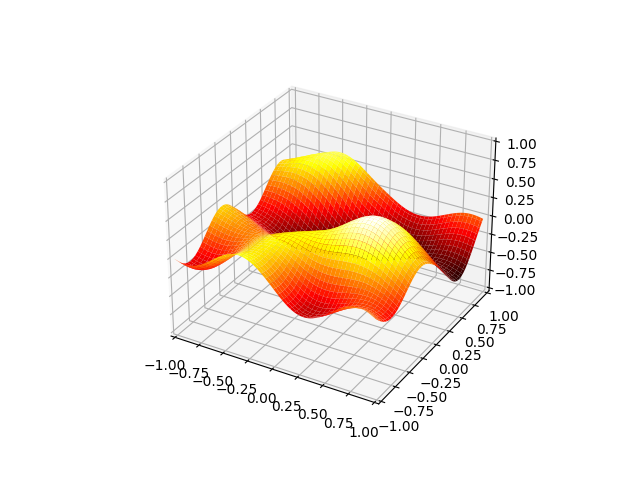

In [143]:
%matplotlib widget

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(*xyz_range[0], ((xyz_range[0][1] - xyz_range[0][0]) / 100))
Y = np.arange(*xyz_range[1], ((xyz_range[1][1] - xyz_range[1][0]) / 100))
X, Y = np.meshgrid(X, Y)
Z = generate_perlin_noise_2d((100, 100), (2, 2))

ax.plot_surface(X, Y, Z, cmap="hot")

ax.set_xlim(*xyz_range[0])
ax.set_ylim(*xyz_range[1])
ax.set_zlim(*xyz_range[2])

plt.show()

In [144]:
df = pd.DataFrame(np.random.randint(100, size=(m * iterations, 2)))

df.columns = ["i", "j"]

df["x"] = X[0, df["i"]]
df["y"] = Y[df["j"], 0]
df["z"] = Z[df["i"], df["j"]] + np.random.normal(0, 0.05, size=(m * iterations))

In [145]:
krnl = RBF(length_scale=1)
model = GaussianProcessRegressor(kernel=krnl, normalize_y=False, random_state=0, alpha=0.001)

model.fit(df[["x", "y"]], df["z"])

c:\Program Files\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(alpha=0.001, kernel=RBF(length_scale=1),
                         random_state=0)

RMSE: 0.27901138231420686


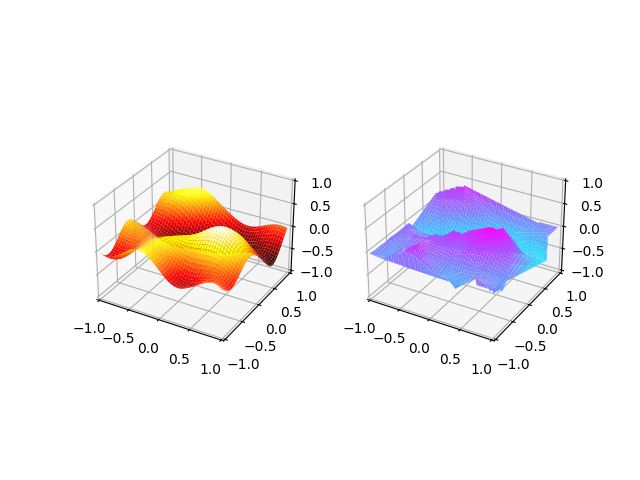

In [146]:
%matplotlib widget

fig, axs = plt.subplots(1, 2, subplot_kw={"projection": "3d"})

pred = model.predict(df[["x", "y"]])

z = griddata((df["x"], df["y"]), pred, (X.T, Y.T), method="linear", fill_value=0)

df = pd.DataFrame(list(product(range(100), range(100))), columns=["i", "j"])

df["x"] = X[0, df["i"]]
df["y"] = Y[df["j"], 0]
df["z"] = Z[df["i"], df["j"]]

pred = model.predict(df[["x", "y"]])

sum = np.sum((pred - df["z"])**2)
rmse = np.sqrt(sum / len(df["z"]))

print("RMSE:", rmse)

axs[0].plot_surface(X, Y, Z, cmap="hot")
axs[1].plot_surface(X, Y, z, cmap="cool")

axs[0].set_xlim(*xyz_range[0])
axs[0].set_ylim(*xyz_range[1])
axs[0].set_zlim(*xyz_range[2])
axs[1].set_xlim(*xyz_range[0])
axs[1].set_ylim(*xyz_range[1])
axs[1].set_zlim(*xyz_range[2])

plt.show()

In [147]:
df = pd.DataFrame(np.random.randint(100, size=(m, 2)))

df.columns = ["i", "j"]

df["x"] = X[0, df["i"]]
df["y"] = Y[df["j"], 0]
df["z"] = Z[df["i"], df["j"]]

curr_range = 100

for idx in range(1, iterations + 1):
    krnl = RBF(length_scale=1)
    model = GaussianProcessRegressor(kernel=krnl, normalize_y=False, random_state=3, alpha=0.001)

    model.fit(df[["x", "y"]], df["z"])

    pred = model.predict(df[["x", "y"]])

    z = griddata((df["x"], df["y"]), pred, (X.T, Y.T), method="linear", fill_value=0)

    max_i, max_j = np.unravel_index(z.argmax(), z.shape)

    arr = np.array([
        [
            [min(max(int(i - 1) + max_i - 49, 0), 99), min(max(int(j - 1) + max_j - 49, 0), 99)]
            
            for j in np.linspace(1, curr_range, int(np.sqrt(m)))
        ] 

        for i in np.linspace(1, curr_range, int(np.sqrt(m)))
    ])

    curr_range /= 2

    arr = arr.reshape((m, 2))

    tmp_df = pd.DataFrame(arr, columns=["i", "j"])

    tmp_df["x"] = X[0, tmp_df["i"]]
    tmp_df["y"] = Y[tmp_df["j"], 0]
    tmp_df["z"] = Z[tmp_df["i"], tmp_df["j"]] + np.random.normal(0, 0.05, size=m)

    df = pd.concat([df, tmp_df], ignore_index=True)

krnl = RBF(length_scale=1)
model = GaussianProcessRegressor(kernel=krnl, normalize_y=False, random_state=3, alpha=0.001)

model.fit(df[["x", "y"]], df["z"])

c:\Program Files\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:420: Converge

GaussianProcessRegressor(alpha=0.001, kernel=RBF(length_scale=1),
                         random_state=3)

0.3960657737393909
0.5763531667019053
(48, 82)
(40, 75)
RMSE: 0.2810873412837439


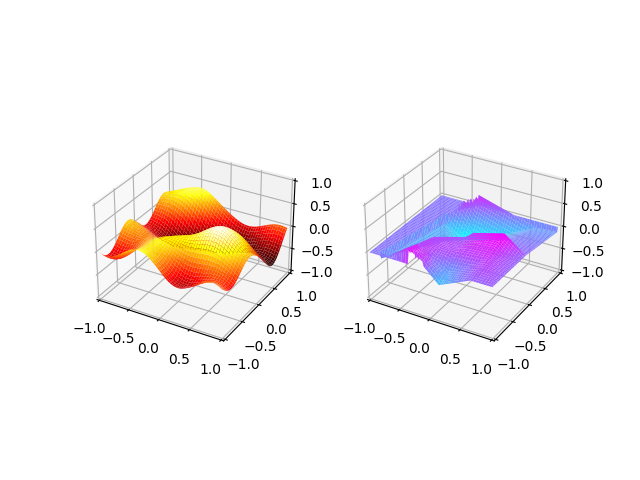

In [148]:
%matplotlib widget

fig, axs = plt.subplots(1, 2, subplot_kw={"projection": "3d"})

pred = model.predict(df[["x", "y"]])

z = griddata((df["x"], df["y"]), pred, (X.T, Y.T), method="linear", fill_value=0)

print(z.max())
print(Z.max())
print(np.unravel_index(z.argmax(), z.shape))
print(np.unravel_index(Z.argmax(), Z.shape))

df = pd.DataFrame(list(product(range(100), range(100))), columns=["i", "j"])

df["x"] = X[0, df["i"]]
df["y"] = Y[df["j"], 0]
df["z"] = Z[df["i"], df["j"]]

pred = model.predict(df[["x", "y"]])

sum = np.sum((pred - df["z"])**2)
rmse = np.sqrt(sum / len(df["z"]))

print("RMSE:", rmse)

axs[0].plot_surface(X, Y, Z, cmap="hot")
axs[1].plot_surface(X, Y, z, cmap="cool")

axs[0].set_xlim(*xyz_range[0])
axs[0].set_ylim(*xyz_range[1])
axs[0].set_zlim(*xyz_range[2])
axs[1].set_xlim(*xyz_range[0])
axs[1].set_ylim(*xyz_range[1])
axs[1].set_zlim(*xyz_range[2])

plt.show()